# 1. Model Complexity and Regularization

In this notebook, we demonstrate how and why we need to use regularizaiton in practice, and the different
types of norms we can use to penalize the size of coefficients. We focus mostly on the $L^p$ case in a linear model, but introduce the example of a polynomial fit for clarity.

### Topics:

#### 1.0 Mathematical Formulation of Regularization and Model Selection for $L^p$. 
#### 1.1 Example of over-fitting with polynomials.
#### 1.2 Example of over-fitting with realistic data.
#### 1.2 Model Selection using $L^1$ and $L^2$

In this first lecture, we are going to look at a very simple example where we have a variable $y$ we wish to predict, along with
a single feature $x$. We will then generalize this to higher dimensions.

## 1.0 Mathematical Formulation of $L^p$ regularizaiton

![alt text](../img/overfitting.png "Title")

Recall that we wish to penalize the size of the coefficients which are present in the model to prevent over-fitting. To do this, we introduce a parameter $\lambda$ such that we seek to find
\begin{equation}
\beta^{\lambda} = \textrm{argmin}_{\beta \in L^p} \left|y - \beta \cdot x\right|^p + \lambda \|\beta\|^q= \textrm{argmin}_{\beta \in L^p} \sum_{i=1}^N |y_i - \beta \cdot x_i|^p  + \lambda \|\beta_i\|^q
\end{equation}



The most common choice of $p$ above is $p=2$, and $q$ is most often $1$ or $2$. 



## 1.1 Example of Polynomial Over Fitting


In [5]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

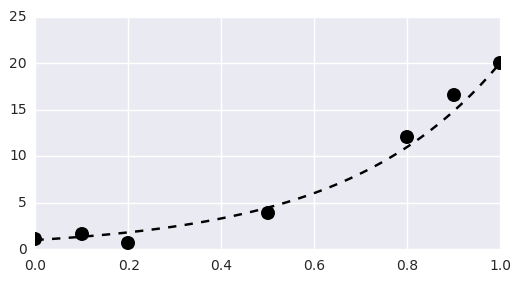

In [67]:
f = lambda x: np.exp(3 * x)

x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

In [7]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

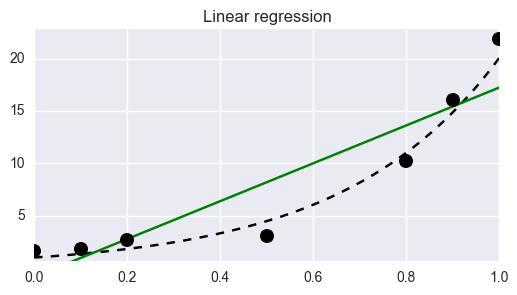

In [8]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

34.45 -16.34 0.00
-287.41 697.77 -532.24 151.05 -8.92 0.00


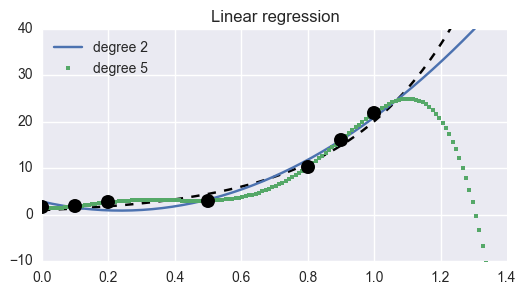

In [9]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");

11.78 6.61 0.00
4.00 3.68 3.60 3.95 4.64 0.00


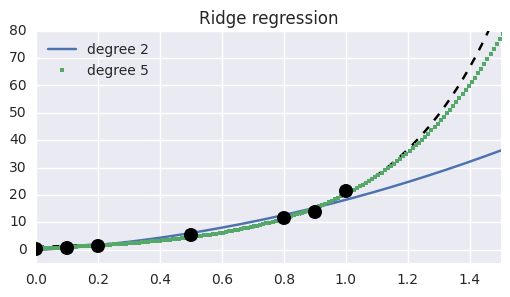

In [14]:
ridge = lm.RidgeCV()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y);
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge regression");

In [70]:
np.vander(x, 5 + 1)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.00000000e-05,   1.00000000e-04,   1.00000000e-03,
          1.00000000e-02,   1.00000000e-01,   1.00000000e+00],
       [  3.20000000e-04,   1.60000000e-03,   8.00000000e-03,
          4.00000000e-02,   2.00000000e-01,   1.00000000e+00],
       [  3.12500000e-02,   6.25000000e-02,   1.25000000e-01,
          2.50000000e-01,   5.00000000e-01,   1.00000000e+00],
       [  3.27680000e-01,   4.09600000e-01,   5.12000000e-01,
          6.40000000e-01,   8.00000000e-01,   1.00000000e+00],
       [  5.90490000e-01,   6.56100000e-01,   7.29000000e-01,
          8.10000000e-01,   9.00000000e-01,   1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00]])

In [8]:
# http://ipython-books.github.io/featured-04/


# 1.2 Example of over-fitting with realistic data - Hotel Booking example.




In [8]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
size=10

purchase_velocity_lastweek = nprnd.randint(0,500,size=size)

hotel_rating = nprnd.randint(1,100,size=size).astype(float)/10

price_per_night_avg = nprnd.randint(100,600,size=size)

sellouts_total = nprnd.randint(1,10,size=size)

location = nprnd.randint(1,100,size=size).astype(float)/10

rooms_left = nprnd.randint(1,500,size=size)

account_num = nprnd.randint(1,100000,size=size)
date='2015-06-01'

df = pd.DataFrame({'hotel_rating':hotel_rating, 'location':location, 'price_per_night_avg':price_per_night_avg,'purchase_velocity_lastweek':purchase_velocity_lastweek,'rooms_left':rooms_left})
rooms_sold = (0.9*purchase_velocity_lastweek + 0.8*hotel_rating + 0.7*sellouts_total + 0.6*price_per_night_avg + 0.4*location)/10
rooms_sold = 0.8*hotel_rating
noise = np.random.normal(0,0.5,size)

rooms_sold=rooms_sold+noise

In [9]:
df = pd.DataFrame({'account': account_num, 'purchase_velocity_lastweek':purchase_velocity_lastweek, 'hotel_rating':hotel_rating,
                   'price_per_night_avg':price_per_night_avg,'sellouts_total':sellouts_total,'location':location,'rooms_left':rooms_left,'const':1})

In [10]:
df.head()

,account,const,hotel_rating,location,price_per_night_avg,purchase_velocity_lastweek,rooms_left,sellouts_total
0,81767,1,7.0,5.0,135,345,178,8
1,63407,1,7.4,1.3,174,255,243,3
2,86972,1,4.0,6.7,128,313,341,4
3,58357,1,4.3,7.0,594,217,208,2
4,91200,1,6.3,1.9,594,189,409,1


Now we will make a simple scatter plot of the data, and try to use the variables above to make the prediction. 
If we didn't know the formula above, we may be tempted to just throw all the variabels into the linear regression
and see what happens!

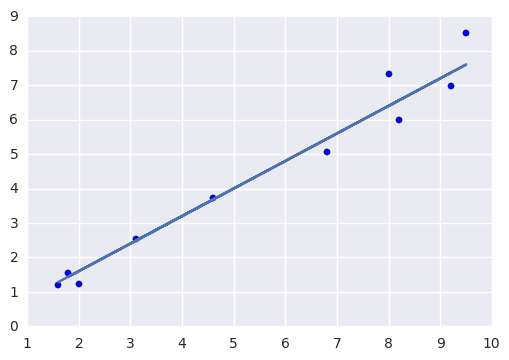

In [73]:
plt.plot(hotel_rating,0.8*hotel_rating)
plt.scatter(hotel_rating,rooms_sold)

In [11]:
X = df
y = rooms_sold

# Attempt 1 - Why not put all of the variables into the model?

In [74]:

# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ -5.84955513e-05,  -4.38017678e-15,   5.80834543e-01,
        -5.17109422e-01,   6.76506626e-03,  -7.80654777e-03,
         2.71142492e-03,  -4.50500961e-02]))
Residual sum of squares: 10.36
Variance score: -10.45


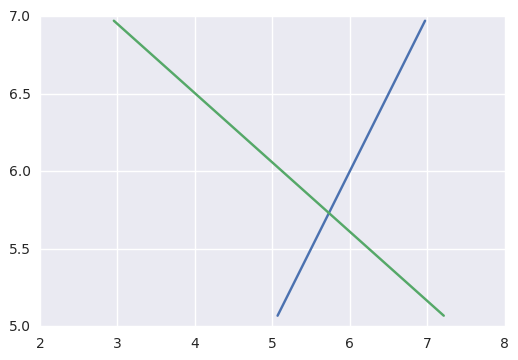

In [75]:
plt.plot(y_test,y_test)
plt.plot(regr.predict(X_test),y_test)

So what went wrong here? What went wrong is that when we introduce extra variables, we increase the **degrees of freedom that our model is allowed to learn on:**

\begin{array}{lcl} \alpha x_{11} + \beta x_{12} + \gamma x_{13}  & = & y_2 \\ \alpha x_{21} + \beta x_{22} + \gamma x_{23}  & = & y_2 \\ \alpha x_{31} + \beta x_{32} + \gamma x_{33}  & = & y_3\end{array}


As long as $y$ belongs to the column space of $X$, there will exist a solution. Even when we have many more equations
than variables, we can always restrict the dimension of the matrix so that we pick up unwanted variance. 



# Attempt 2 - Just one variable

In [16]:
X = df[['hotel_rating','const']]
y = rooms_sold

In [17]:
# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.71393657,  0.        ]))
Residual sum of squares: 0.21
Variance score: -0.12


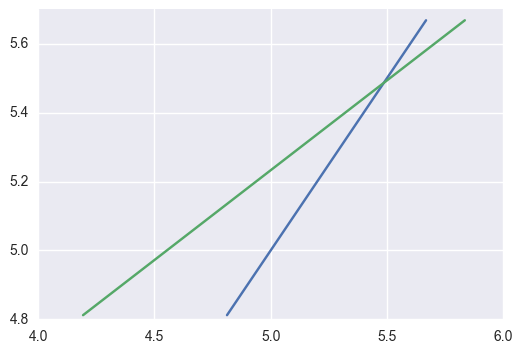

In [18]:
plt.plot(y_test,y_test)
plt.plot(regr.predict(X_test),y_test)

Doesn't this look much better? But going thorugh variables one by one is not practical when you have hundreds, or 
even thousands of variables. How do we have a more sysmetatic approach?

# $L^p$ Regularization - A more general approach

![alt text](../img/regularization.png "Title")

## $L^2$ - Ridge Regression

In [19]:
X = df
y = rooms_sold
# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = Ridge(alpha=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ -1.82036084e-05,   0.00000000e+00,   1.26552706e-03,
        -8.11358022e-04,   3.94662474e-03,   3.36885097e-03,
        -9.41948854e-03,  -1.12267926e-03]))
Residual sum of squares: 4.40
Variance score: -23.04


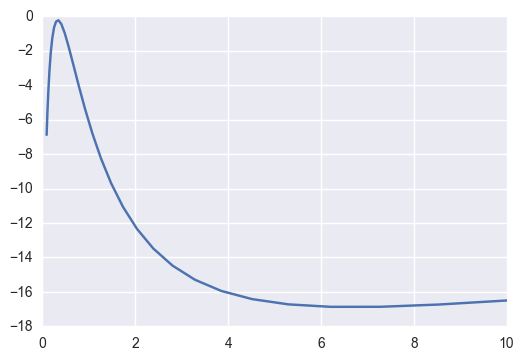

In [20]:
# Create linear regression object
alphas = np.logspace(-1,1,30)

scores = []

for alpha in alphas:
    regr = Ridge(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)
  

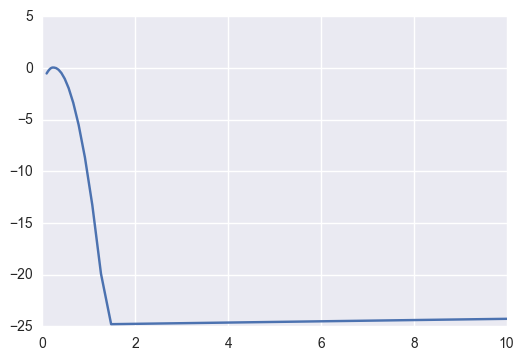

In [21]:
# Create linear regression object
alphas = np.logspace(-1,1,30)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)


**Exercise:** Notice how the performance drops off much quicker for Lasso ($L^1$). Why is that the case?

**Answer:** $L^1$ tends to send all of the coefficients to zero because of the way the level sets are formed as you
may recall. $L^2$, being a smooth norm, spreads out the effect onto the coefficients more evenly as the parameter is restricted. 

Not surprisingly, the larger we allow the bound on the coeffciients to be, the worse the performance. 

# Cross validation with reguarlization

In this section we will use cross validation along with regularization, and we will see
that we really need both. Cross validated models that are not optimized will likely perform
badly on all folds - it ensures we haven't selected some special subset of data, but it does nothing
to optimize the model

In [12]:
from sklearn.model_selection import cross_val_score

In [26]:
best_alpha = np.argmax(scores)

In [27]:
alphas[best_alpha]

0.2212216291070449

In [30]:
size=50

purchase_velocity_lastweek = nprnd.randint(0,500,size=size)

hotel_rating = nprnd.randint(1,100,size=size).astype(float)/10

price_per_night_avg = nprnd.randint(100,600,size=size)

sellouts_total = nprnd.randint(1,10,size=size)

location = nprnd.randint(1,100,size=size).astype(float)/10

rooms_left = nprnd.randint(1,500,size=size)

account_num = nprnd.randint(1,100000,size=size)
date='2015-06-01'

df = pd.DataFrame({'hotel_rating':hotel_rating, 'location':location, 'price_per_night_avg':price_per_night_avg,'purchase_velocity_lastweek':purchase_velocity_lastweek,'rooms_left':rooms_left})
rooms_sold = (0.9*purchase_velocity_lastweek + 0.8*hotel_rating + 0.7*sellouts_total + 0.6*price_per_night_avg + 0.4*location)/10
rooms_sold = 0.8*hotel_rating
noise = np.random.normal(0,0.5,size)

rooms_sold=rooms_sold+noise
df = pd.DataFrame({'account': account_num, 'purchase_velocity_lastweek':purchase_velocity_lastweek, 'hotel_rating':hotel_rating,
                   'price_per_night_avg':price_per_night_avg,'sellouts_total':sellouts_total,'location':location,'rooms_left':rooms_left,'const':1})

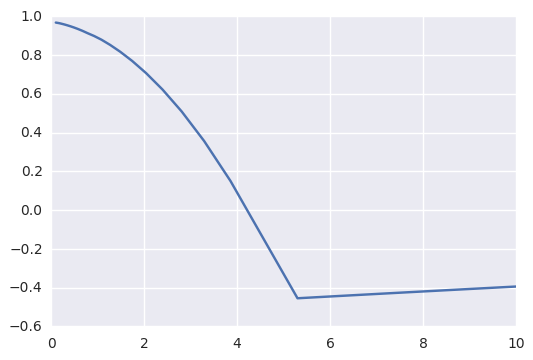

In [38]:
# Create linear regression object
alphas = np.logspace(-1,1,30)
from sklearn.linear_model import Lasso
scores = []
y = rooms_sold
X = df
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)


In [32]:
best_alpha=alphas[np.argmax(scores)]

In [39]:

y = rooms_sold
X = df
regr = Lasso(alpha=alphas[best_alpha])
scores = cross_val_score(regr, X, y, cv=5)
scores 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 0.96722295,  0.82729394,  0.95125574,  0.94297579,  0.96752576])

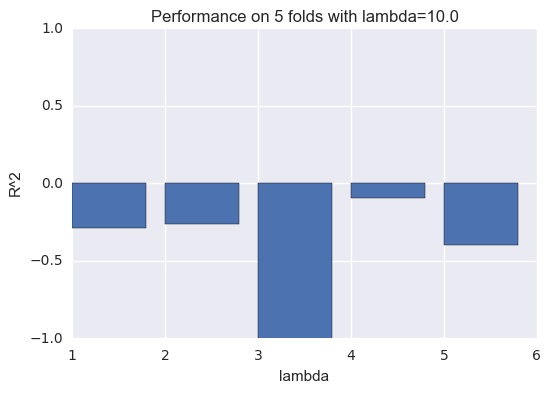

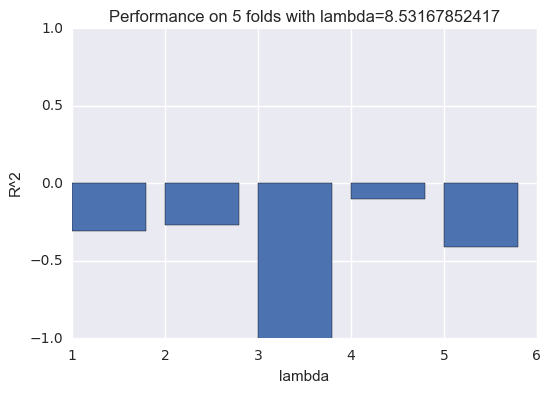

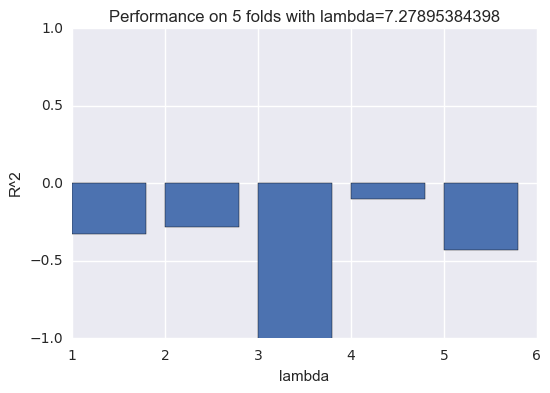

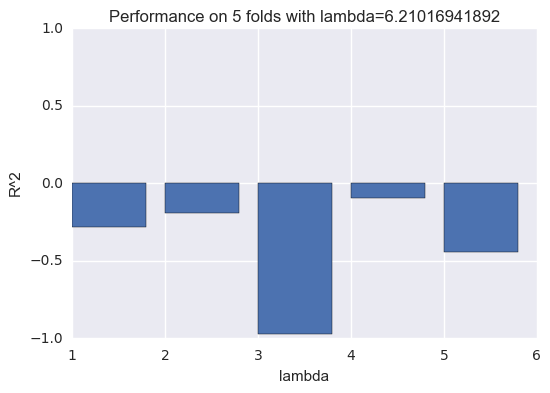

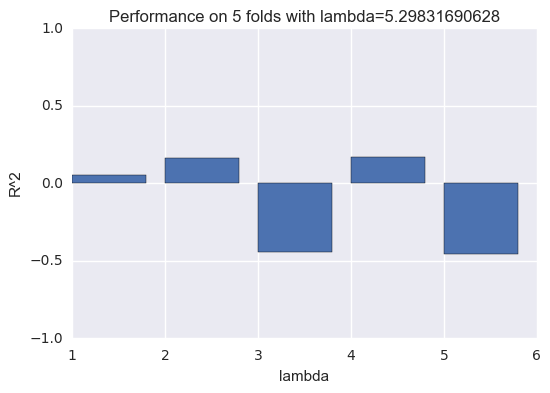

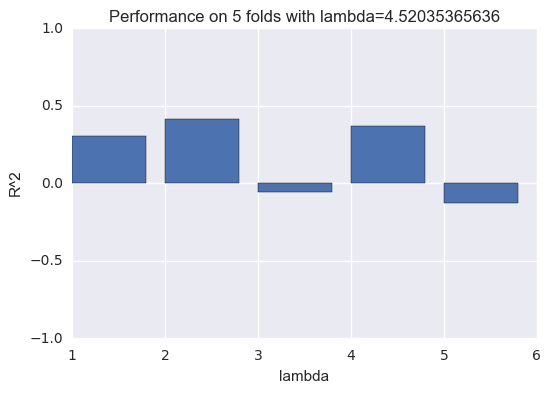

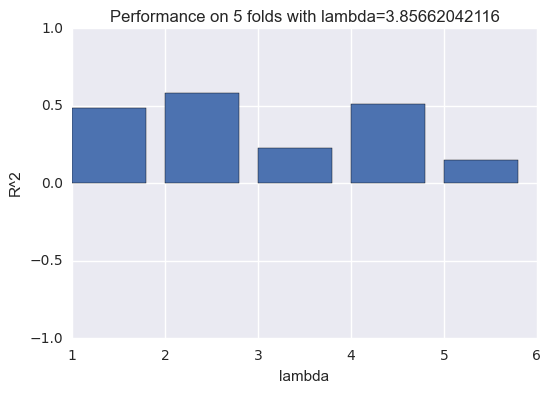

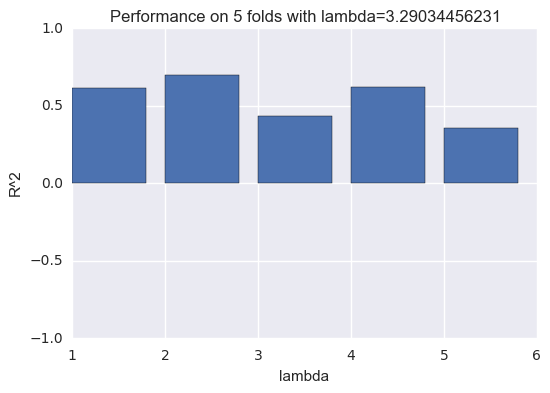

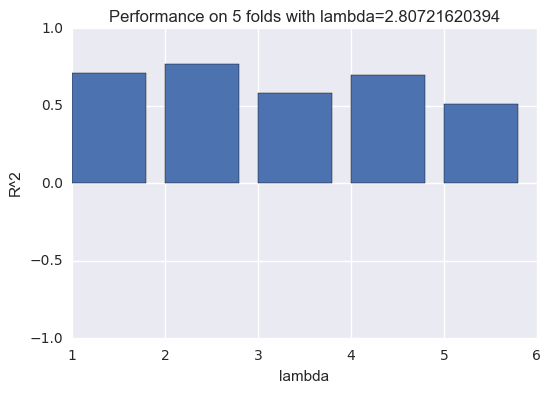

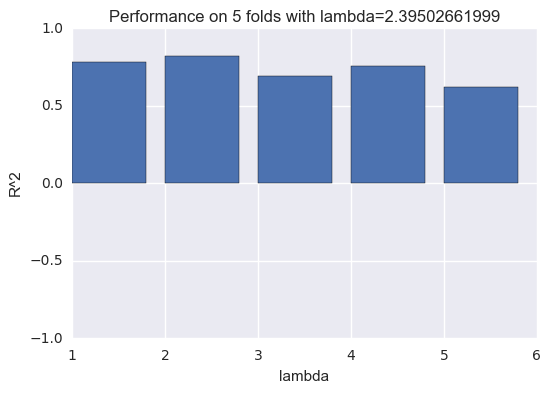

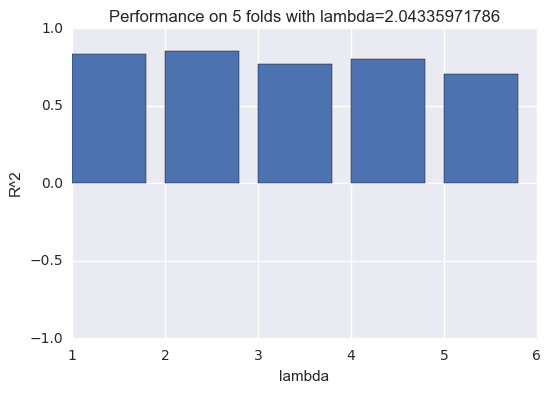

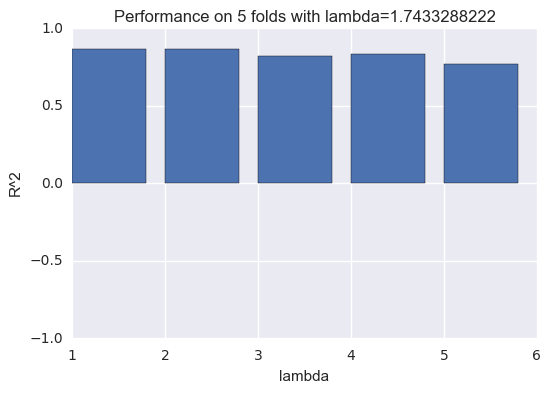

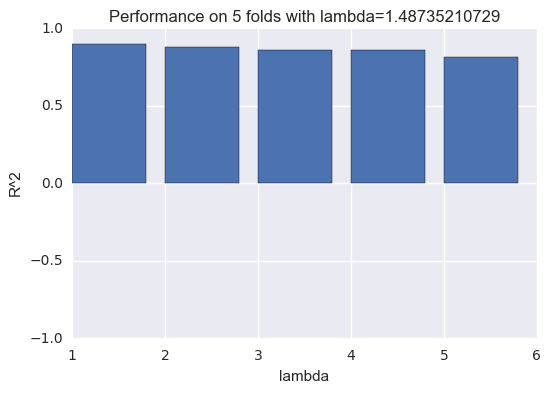

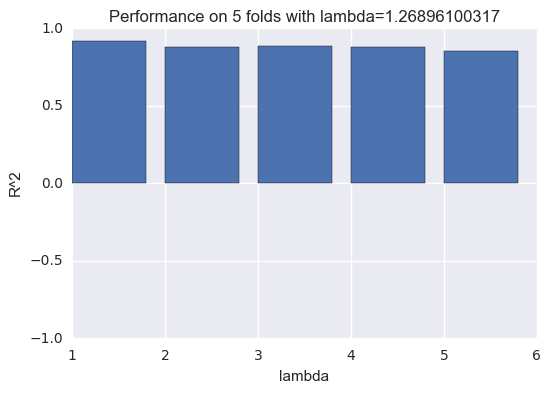

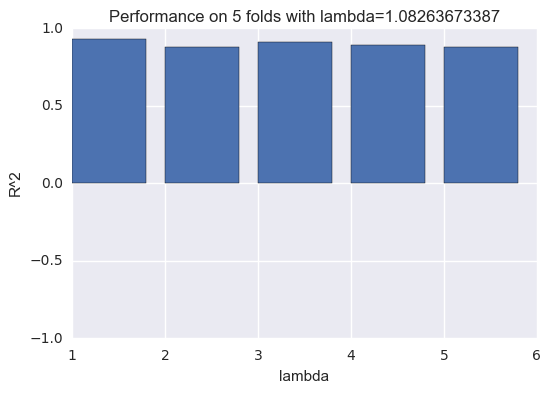

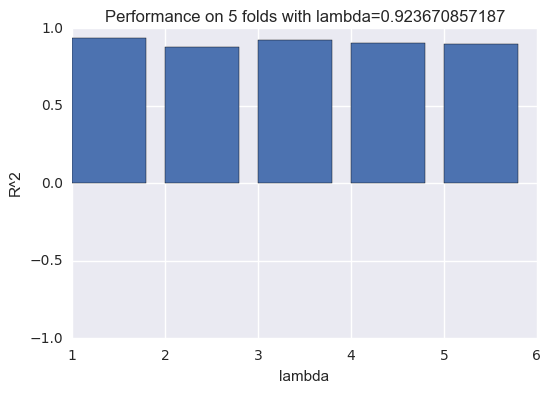

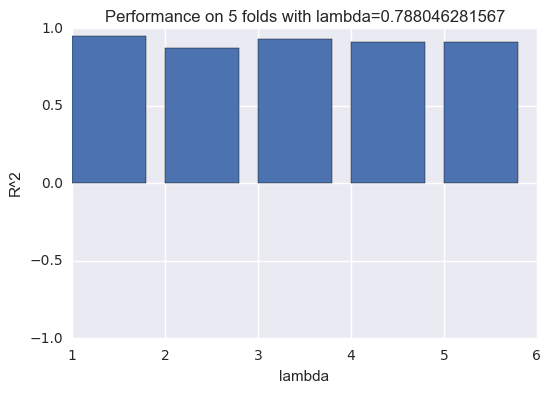

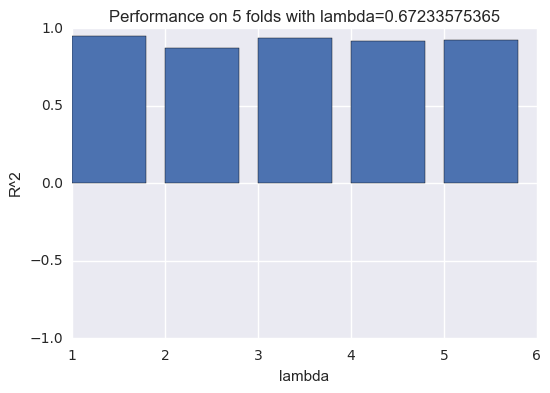

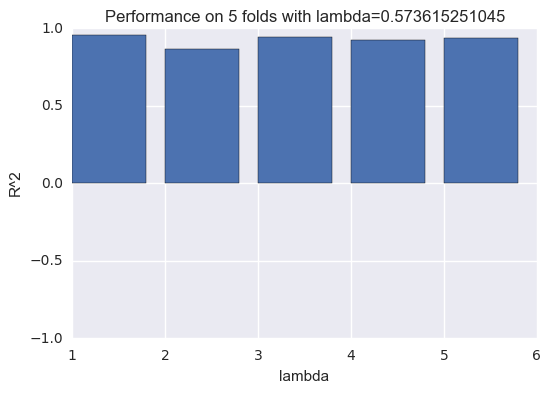

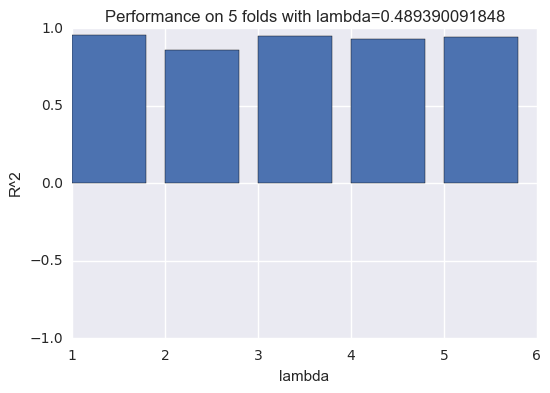

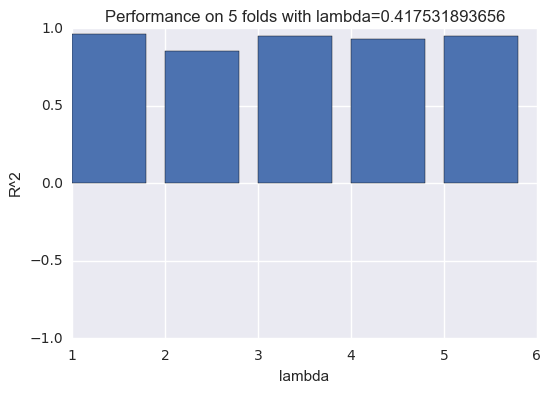

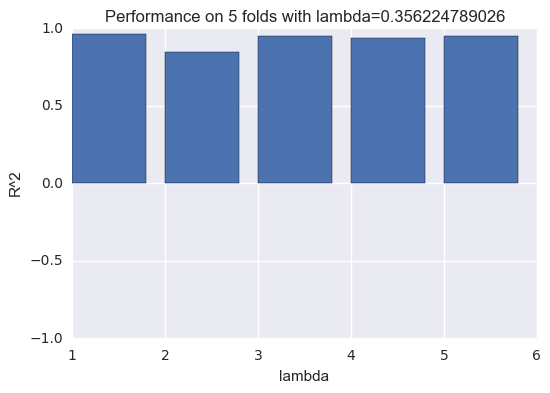

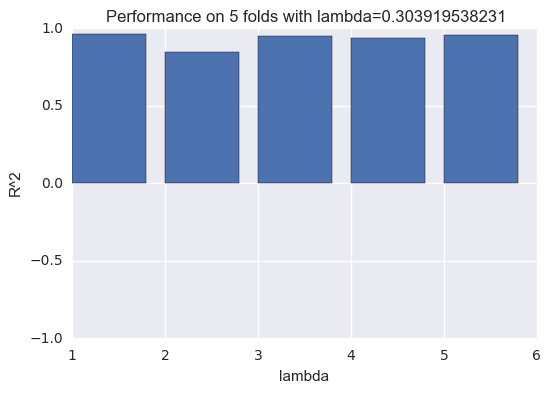

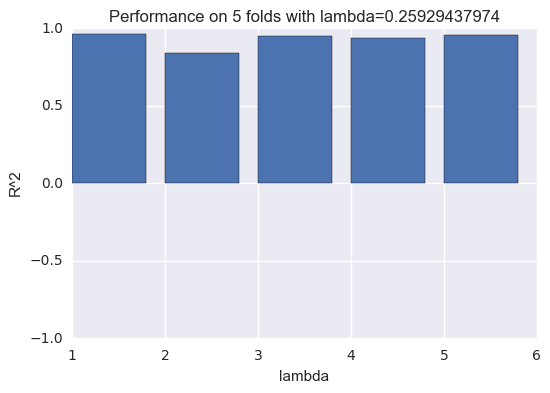

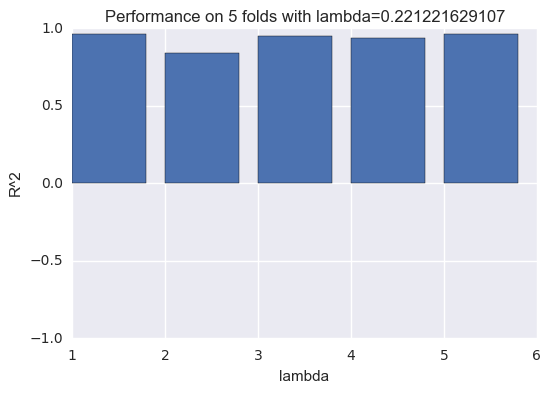

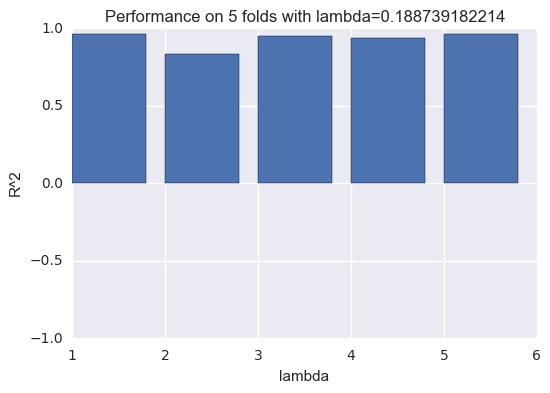

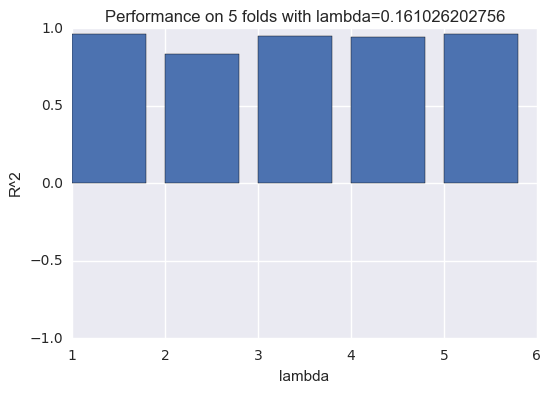

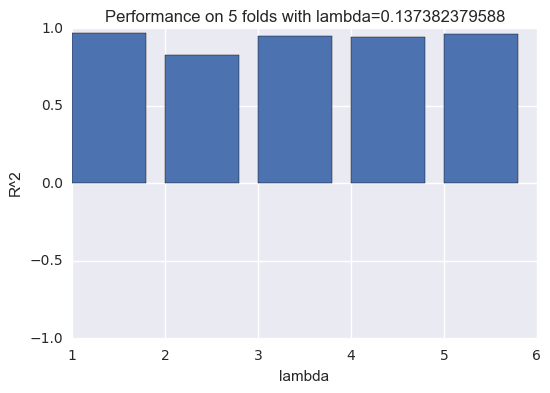

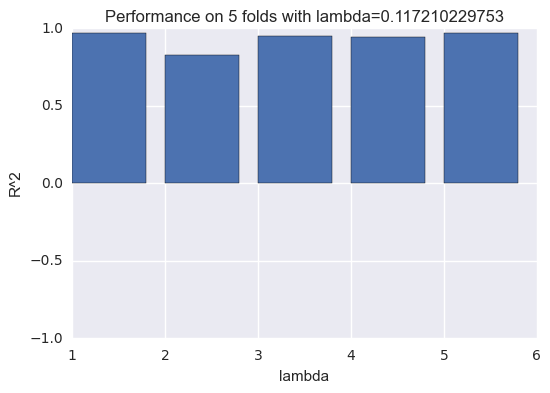

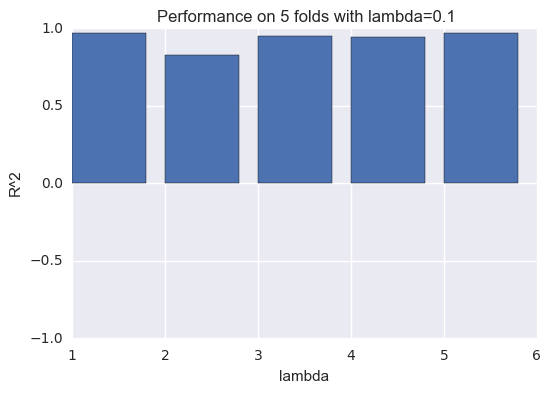

In [40]:

for alpha in alphas[::-1]:
    regr = Lasso(alpha=alpha)
    scores = cross_val_score(regr, X, y, cv=5)
    plt.ylim([-1,1])
    plt.xlabel('lambda')
    plt.ylabel('R^2')
    plt.title('Performance on 5 folds with lambda=' + str(alpha))
    plt.bar(range(1,6),scores)
    plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


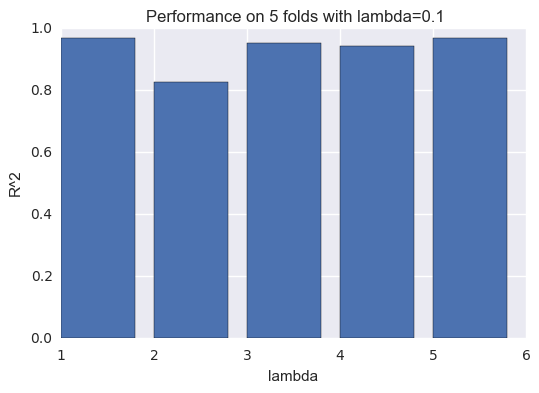

In [41]:
regr = Lasso(alpha=alphas[best_alpha])
scores = cross_val_score(regr, X, y, cv=5)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alpha))
plt.bar(range(1,6),scores)
plt.show()

# Feature importance

In this section we normalize our features and find the optimal constant once again (it's different than if we dind't normalize!).
Then we plot the coefficients. 

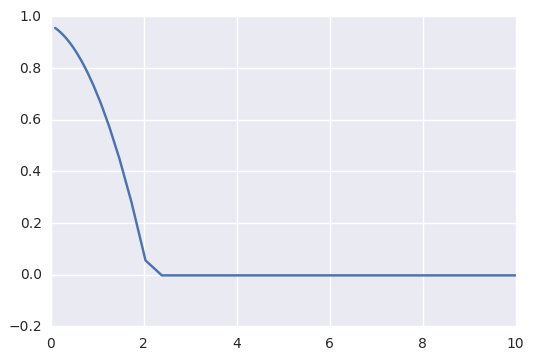

In [59]:
y = rooms_sold
X = df

scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Create linear regression object
alphas = np.logspace(-1,1,30)
from sklearn.linear_model import Lasso
scores = []

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)
best_alpha=alphas[np.argmax(scores)]

In [60]:
regr = Lasso(alpha=alphas[best_alpha])
regr.fit(X_train,y_train)
regr.coef_

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([ 0.        ,  0.        ,  2.13505155, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [61]:
[round(x,2) for x in range(len(regr.coef_))]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [62]:
df_coeffs = pd.DataFrame({'coeffs':regr.coef_, 'name':df.columns.values})

In [63]:
df_coeffs=df_coeffs.sort(['coeffs'])

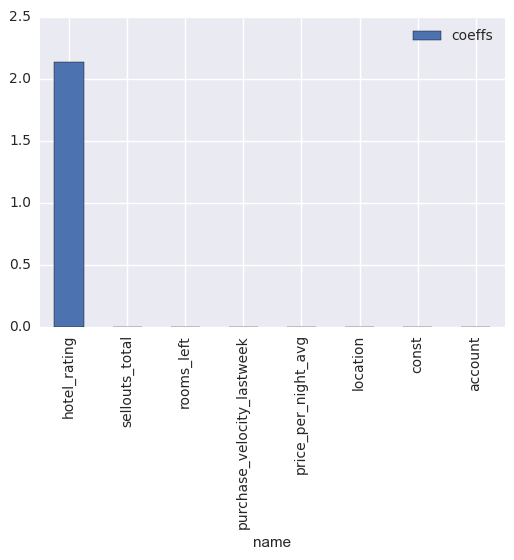

In [65]:
df_coeffs[::-1].plot(x='name',y='coeffs',kind='bar')

In [66]:
df_coeffs[::-1]['coeffs'].values

array([ 2.13505155,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ])

# A visual example with digit recognition

Automatically created module for IPython interactive environment
C=100.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9104
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9104
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8614
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


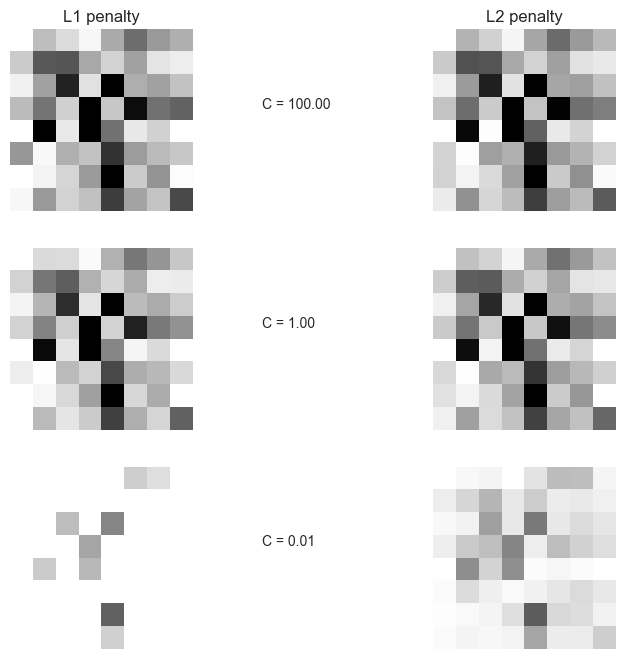

In [2]:
print(__doc__)

# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)

plt.figure(figsize=(10,8))
# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

# Performance via regularization

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [39]:
alphas = np.logspace(-1, 4, 60)
enet = LogisticRegression(C=0.1,penalty='l2')
train_errors = list()
test_errors = list()
for alpha in alphas:
    #enet.set_params(alpha=alpha)
    enet = LogisticRegression(C=alpha,penalty='l2')
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(C=alpha_optim)
coef = enet.fit(X, y).coef_

Optimal regularization parameter : 0.265294846443


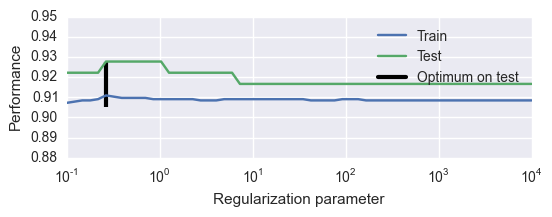

In [40]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0.88, 0.95])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef

plt.legend()
#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

In [52]:
alphas = np.logspace(-1, 4, 60)
enet = LogisticRegression(C=0.1,penalty='l1')
train_errors = list()
test_errors = list()
for alpha in alphas:
    #enet.set_params(alpha=alpha)
    enet = LogisticRegression(C=alpha,penalty='l1')
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(C=alpha_optim)
coef = enet.fit(X, y).coef_

Optimal regularization parameter : 0.179571449437


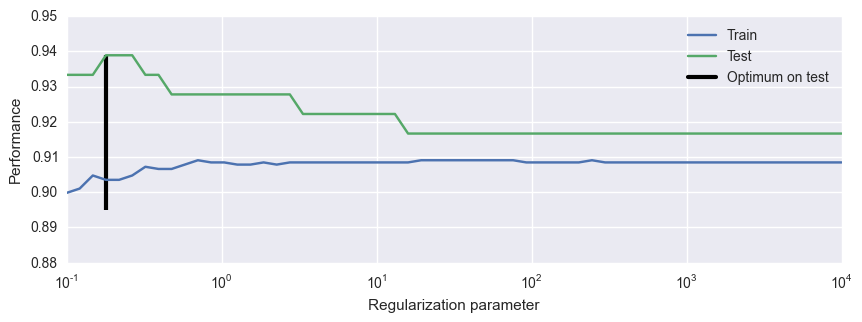

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0.88, 0.95])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef

plt.legend()
#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

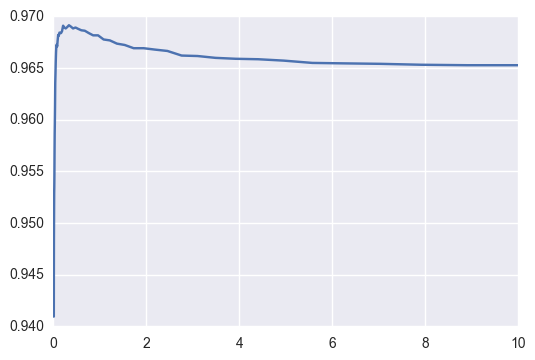

In [49]:
# Create linear regression object
from sklearn.metrics import roc_curve, auc
alphas = np.logspace(-2,1,60)
from sklearn.utils import shuffle
# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l1')

    # Train the model using the training sets
    #regr.fit(X_train, y_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l1')
    scores.append(roc_auc)
plt.plot(alphas,scores)
  